In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/craigslist-carstrucks-data/vehicles.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from pandas_profiling import ProfileReport

In [3]:
data = pd.read_csv('../input/craigslist-carstrucks-data/vehicles.csv')
data.head(2)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7088746062,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,tl,NaN,NaN,...,NaN,NaN,other,blue,https://images.craigslist.org/01414_3LIXs9EO33...,2012 Acura TL Base 4dr Sedan Offered by: B...,NaN,nc,35.7636,-78.7443
1,7088745301,https://greensboro.craigslist.org/ctd/d/bmw-3-...,greensboro,https://greensboro.craigslist.org,0,2011.0,bmw,335,NaN,6 cylinders,...,rwd,NaN,convertible,blue,https://images.craigslist.org/00S0S_1kTatLGLxB...,BMW 3 Series 335i Convertible Navigation Dakot...,NaN,nc,NaN,NaN


In [4]:
data.nunique()

id              539759
url             539759
region             403
region_url         413
price            18386
year               113
manufacturer        43
model            36948
condition            6
cylinders            8
fuel                 5
odometer        122400
title_status         6
transmission         3
vin             181677
drive                3
size                 4
type                13
paint_color         12
image_url       364282
description     454053
county               0
state               51
lat              54587
long             54552
dtype: int64

In [5]:
data.shape

(539759, 25)

Since this is a huge dataset first it's better to remove as much unnecessary data as we can.

Let's look at the rows and remove the unwanted ones.

Some of the columns that don't look that useful for analysis are:-
1. url
2. region_url
3. image_url
4. description
5. county (all null values)

In [6]:
#dropping unnecessary columns
data.drop(['url','region_url','image_url','description','county'], axis=1, inplace=True)

In [7]:
data.head(3)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,state,lat,long
0,7088746062,greensboro,10299,2012.0,acura,tl,NaN,NaN,gas,90186.0,clean,automatic,19UUA8F22CA003926,NaN,NaN,other,blue,nc,35.7636,-78.7443
1,7088745301,greensboro,0,2011.0,bmw,335,NaN,6 cylinders,gas,115120.0,clean,automatic,NaN,rwd,NaN,convertible,blue,nc,NaN,NaN
2,7088744126,greensboro,9500,2011.0,jaguar,xf,excellent,NaN,gas,85000.0,clean,automatic,NaN,NaN,NaN,NaN,blue,nc,36.1032,-79.8794


In [ ]:
report = ProfileReport(data)
report

In [8]:
data.describe()

,id,price,year,odometer,lat,long
count,5.397590e+05,5.397590e+05,538772.000000,4.407830e+05,530785.000000,530785.000000
mean,7.087609e+09,1.954214e+05,2009.830982,1.008008e+05,38.432128,-94.040501
std,5.234176e+06,2.208252e+07,9.161334,1.767058e+05,5.916936,17.626658
min,7.065765e+09,0.000000e+00,0.000000,0.000000e+00,-84.911400,-176.810000
25%,7.084240e+09,4.400000e+03,2007.000000,4.703850e+04,34.197100,-106.782000
50%,7.088973e+09,9.500000e+03,2012.000000,9.330000e+04,39.077600,-88.100900
75%,7.092094e+09,1.792600e+04,2015.000000,1.377550e+05,42.449100,-81.219000
max,7.093537e+09,4.294967e+09,2021.000000,6.480922e+07,84.514800,161.016000


# How price is distributed?

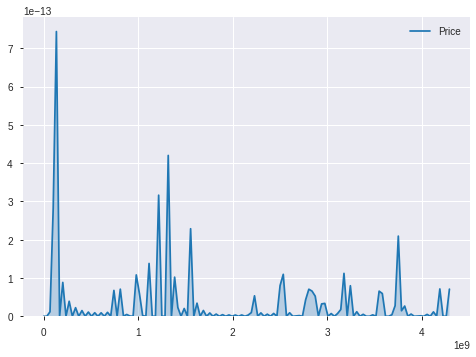

In [9]:
sns.kdeplot(data=data['price'],label="Price" ,shade=True)

# Which brand cars are most expensive? ----> Toyota

In [27]:
price = data.groupby('manufacturer')['price'].max().reset_index()
price  = price.sort_values("price")
price = price.tail(10)
fig = px.pie(price,
             values="price",
             names="manufacturer",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Which brand cars are cheapest?-----> Land Rover (other than the zero values)

In [26]:
price = data.groupby('manufacturer')['price'].min().reset_index()
price  = price.sort_values("price")
price = price[price['price']!=0] #this is necessary so that zero price values are not considered
price = price.head(10)
fig = px.pie(price,
             values="price",
             names="manufacturer",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Which % of expensive cars are in excellent condition?-----> 51.8%

In [25]:
price = data.groupby('condition')['price'].max().reset_index()
price  = price.sort_values("price")
price = price.tail(10)
fig = px.pie(price,
             values="price",
             names="condition",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Distribution of the odometer

But before checking the odometer distribution it's absolutely necessary to know what does the column signify. I didn't know that.

So I did a quick google search and came up with the conclusion that:

Odometer is the device that measures how much distance a car has travelled from the day it was made. 
So the column contains the distance travelled by a car before being scraped.

Now lets see the distribution.

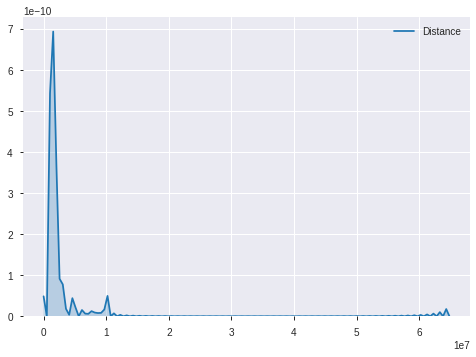

In [13]:
sns.kdeplot(data=data['odometer'], label="Distance", shade=True)

# Which fuel type cars are most expensive?------> gas

In [24]:
price = data.groupby('fuel')['price'].max().reset_index()
price  = price.sort_values("price")
price = price.tail()
fig = px.pie(price,
             values="price",
             names="fuel",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Which paint color is popular?------> White

In [20]:
color = data.loc[:,['paint_color']]
color['count'] = color.groupby(color['paint_color'])['paint_color'].transform('count')
color = color.drop_duplicates()
color = color.sort_values("count",ascending = False)
color = color.head(10)
fig = px.pie(color,
             values="count",
             names="paint_color",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

Let's drop some more columns which I find not important.

1. id (unique for each row in dataset)
2. vin (unique id for each car)

In [29]:
data.drop(['id','vin'], axis=1, inplace=True)

In [30]:
data.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,greensboro,10299,2012.0,acura,tl,NaN,NaN,gas,90186.0,clean,automatic,NaN,NaN,other,blue,nc,35.7636,-78.7443
1,greensboro,0,2011.0,bmw,335,NaN,6 cylinders,gas,115120.0,clean,automatic,rwd,NaN,convertible,blue,nc,NaN,NaN
2,greensboro,9500,2011.0,jaguar,xf,excellent,NaN,gas,85000.0,clean,automatic,NaN,NaN,NaN,blue,nc,36.1032,-79.8794
3,greensboro,3995,2004.0,honda,element,NaN,NaN,gas,212526.0,clean,automatic,fwd,NaN,SUV,orange,nc,35.7636,-78.7443
4,lincoln,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,ne,41.1345,-96.2458


I think I will stop my today's analysis here. Let's continue with more analysis tomorrow.